#Introduction
This notebook performs an end-to-end machine learning workflow on a dataset.
The dataset contains information about the number of study hours, previous exam scores, and the pass/fail status of students. The workflow includes:

1. **Exploratory Data Analysis (EDA)**: Analyzing the data distributions and relationships.
2. **Feature Scaling**: Standardizing the features for better model performance.
3. **Model Training**: Training a Logistic Regression model to predict whether a student will pass or fail.
4. **Prediction and Evaluation**: Making predictions and evaluating model performance using metrics and visualizations.

# Let's get started!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Define the dataset based on the image provided
data = pd.read_csv('/content/student_exam_data_new.csv')
data = pd.DataFrame(data)

# Display the first few rows of the dataframe
data.head()


,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


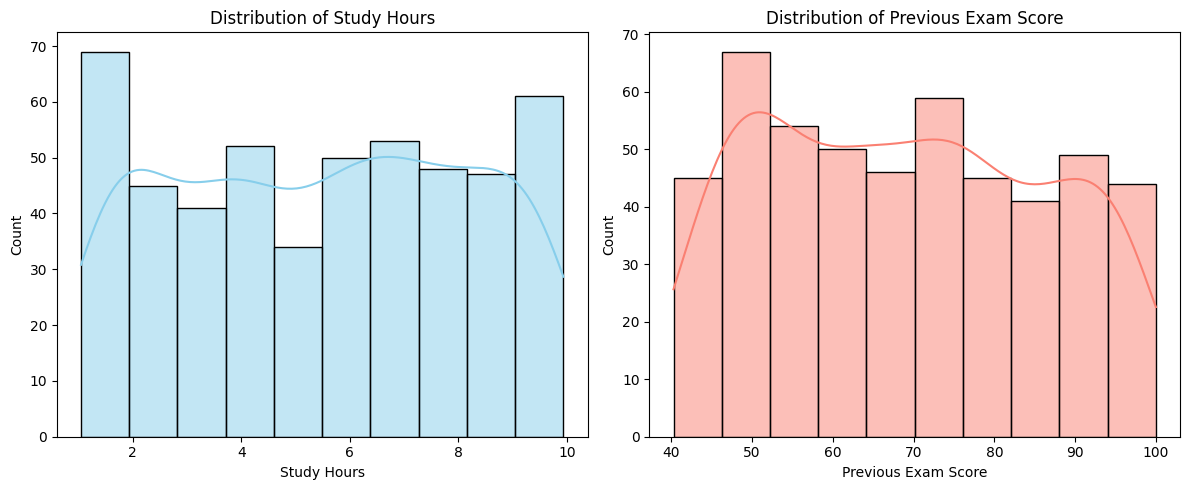

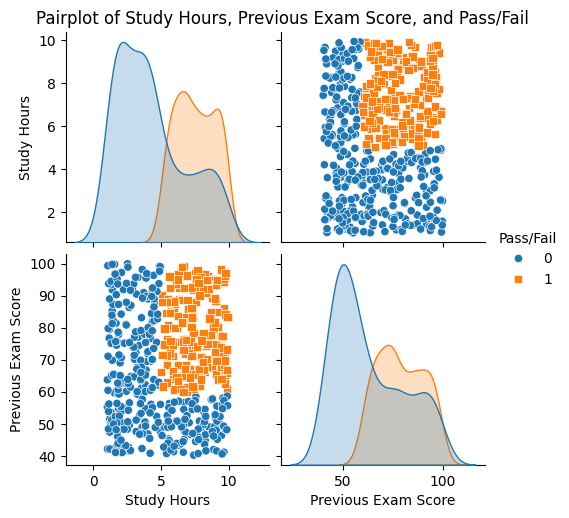

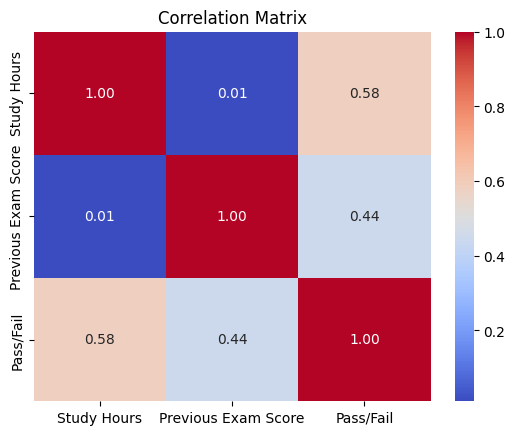

In [2]:
# EDA: Plotting the distributions and pairplot to understand relationships
plt.figure(figsize=(12, 5))

# Distribution of Study Hours
plt.subplot(1, 2, 1)
sns.histplot(data['Study Hours'], kde=True, color='skyblue')
plt.title('Distribution of Study Hours')

# Distribution of Previous Exam Score
plt.subplot(1, 2, 2)
sns.histplot(data['Previous Exam Score'], kde=True, color='salmon')
plt.title('Distribution of Previous Exam Score')

plt.tight_layout()
plt.show()

# Pairplot to visualize relationships
sns.pairplot(data, hue='Pass/Fail', markers=["o", "s"])
plt.suptitle("Pairplot of Study Hours, Previous Exam Score, and Pass/Fail", y=1.02)
plt.show()

# Correlation matrix
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [3]:
# Feature Scaling using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Study Hours', 'Previous Exam Score']])

# Creating a DataFrame with scaled features
scaled_data = pd.DataFrame(scaled_features, columns=['Scaled Study Hours', 'Scaled Previous Exam Score'])
scaled_data['Pass/Fail'] = data['Pass/Fail']

# Display the first few rows of the scaled dataset
scaled_data.head()


,Scaled Study Hours,Scaled Previous Exam Score,Pass/Fail
0,-0.415636,0.758080,0
1,1.515310,0.189844,1
2,0.782307,-0.604555,0
3,0.335457,1.163515,1
4,-1.147973,0.710990,0


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89        64
           1       0.82      0.78      0.80        36

    accuracy                           0.86       100
   macro avg       0.85      0.84      0.85       100
weighted avg       0.86      0.86      0.86       100

Confusion Matrix:
 [[58  6]
 [ 8 28]]
ROC AUC Score: 0.9301215277777778


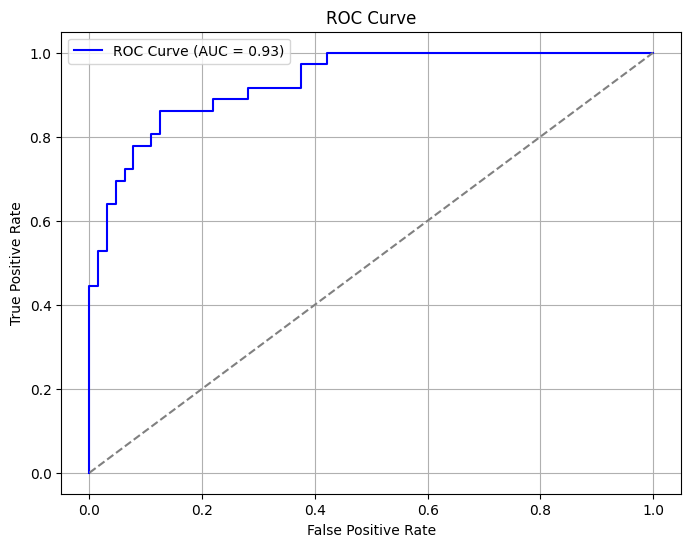

In [4]:
# Splitting the data into training and testing sets
X = scaled_data[['Scaled Study Hours', 'Scaled Previous Exam Score']]
y = scaled_data['Pass/Fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Model evaluation
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Printing classification report and confusion matrix
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)

# Plotting ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()
